# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.071819e+01     7.591936e+00
 * time: 0.0018279552459716797
     1     2.836503e+01     5.531522e+00
 * time: 0.006725788116455078
     2     1.963474e+01     4.423641e+00
 * time: 0.011067867279052734
     3     1.369661e+01     2.639956e+00
 * time: 0.015877962112426758
     4     1.107014e+01     1.502466e+00
 * time: 0.020102977752685547
     5     1.076306e+01     3.102198e+00
 * time: 0.023512840270996094
     6     1.008747e+01     1.947249e+00
 * time: 0.027121782302856445
     7     9.435026e+00     1.556462e+00
 * time: 0.030726909637451172
     8     8.848215e+00     1.409665e+00
 * time: 0.03439593315124512
     9     8.562178e+00     1.088183e+00
 * time: 0.03843283653259277
    10     8.430584e+00     8.456434e-01
 * time: 0.042807817459106445
    11     8.324146e+00     1.011134e+00
 * time: 0.04713892936706543
    12     8.285376e+00     7.870264e-01
 * time: 0.05058884620666504
    13     8.231581e+00     6.760513e-0

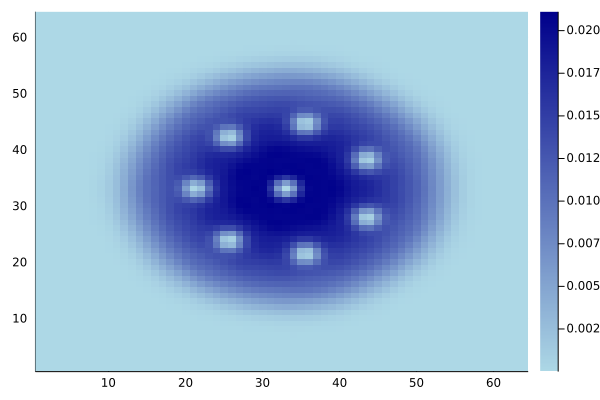

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)